In [8]:
import pandas as pd 

df = pd.read_csv('conso-hdf.csv',index_col=0)
df = df[['date','consommation_brute_electricite_rte']]
df['date'] = pd.to_datetime(df['date'])

In [16]:
df = df.groupby('date').mean()
df.to_csv('df_gp.csv')

In [24]:
df = pd.read_csv('df_gp.csv')
df.date = pd.to_datetime(df.date)

In [25]:
df_train = df[:3000]
df_test = df[3000:]

<AxesSubplot: xlabel='date'>

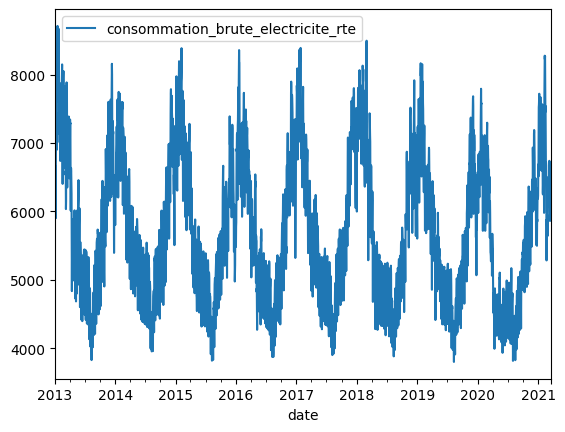

In [26]:
df_train.plot(x='date',y='consommation_brute_electricite_rte')

<AxesSubplot: xlabel='date'>

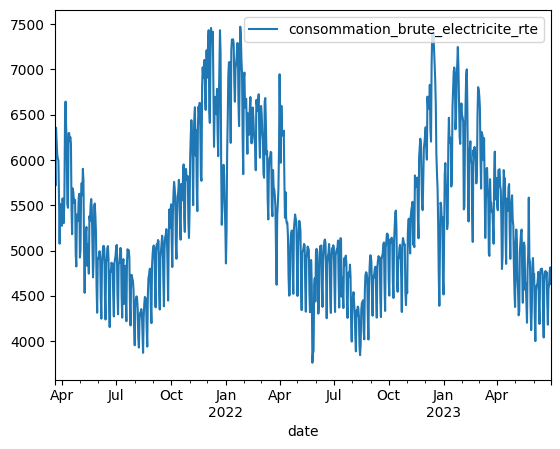

In [27]:
df_test.plot(x='date',y='consommation_brute_electricite_rte')

In [28]:
def create_time_feature(df):
    df['dayofmonth'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.weekofyear
    return df

In [30]:
train = create_time_feature(df_train)
test = create_time_feature(df_test)
test = test.set_index('date')
train = train.set_index('date')

/tmp/ipykernel_79755/3458325854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofmonth'] = df['date'].dt.day
/tmp/ipykernel_79755/3458325854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['date'].dt.dayofweek
/tmp/ipykernel_79755/3458325854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [31]:
X_train = train.drop('consommation_brute_electricite_rte', axis =1)
y_train = train['consommation_brute_electricite_rte']

X_test = test.drop('consommation_brute_electricite_rte', axis =1)
y_test = test['consommation_brute_electricite_rte']

In [32]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train,y_train,verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

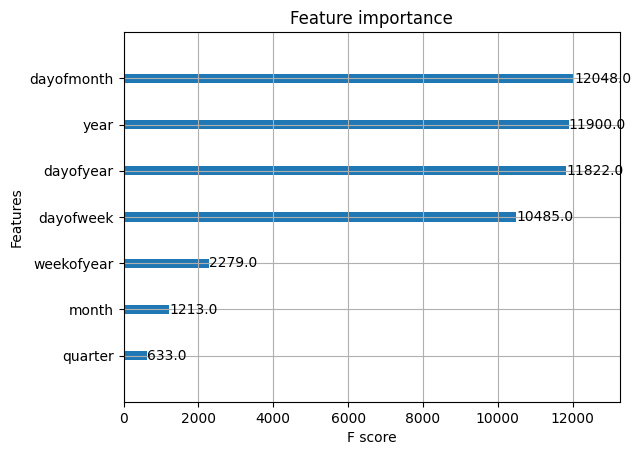

In [33]:
xgb.plot_importance(reg)

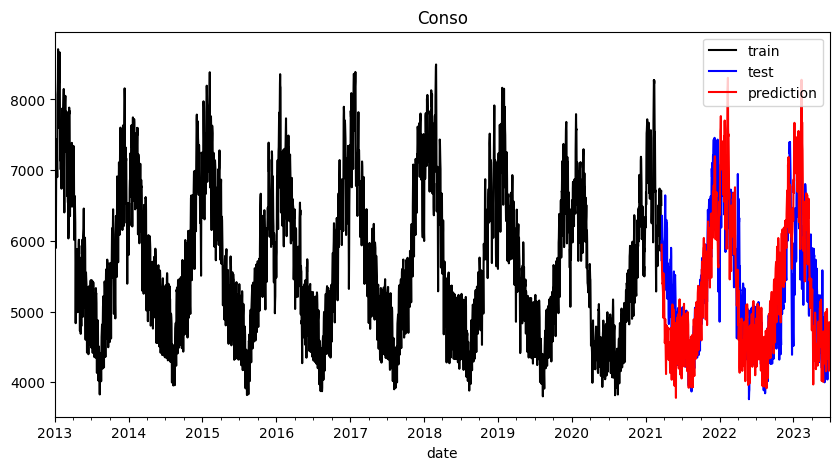

In [35]:
import matplotlib.pyplot as plt

test['conso_prediction'] = reg.predict(X_test)

train['consommation_brute_electricite_rte'].plot(style='k', figsize=(10,5), label = 'train')
test['consommation_brute_electricite_rte'].plot(style='b', figsize=(10,5), label = 'test')
test['conso_prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('Conso')
plt.legend()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print('RMSE: ', round(mean_squared_error(y_true=test['consommation_brute_electricite_rte'],y_pred=test['conso_prediction']),3))
print('MAE: ', round(mean_absolute_error(y_true=test['consommation_brute_electricite_rte'],y_pred=test['conso_prediction']),3))
print('MAPE: ', round(mean_absolute_percentage_error(y_true=test['consommation_brute_electricite_rte'],y_pred=test['conso_prediction']),3))

RMSE:  340196.611
MAE:  416.85
MAPE:  0.075
